In [39]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from  sklearn.preprocessing import MinMaxScaler

In [2]:
#reading in the csv file of the individual car models
ford = pd.read_csv('ford.csv')
audi = pd.read_csv('audi.csv')
hyundi = pd.read_csv('hyundi.csv')
merc = pd.read_csv('merc.csv')
cclass = pd.read_csv('cclass.csv')
toyota = pd.read_csv('toyota.csv')
skoda = pd.read_csv('skoda.csv')
vauxhall = pd.read_csv('vauxhall.csv')
bmw= pd.read_csv('bmw.csv')
vw = pd.read_csv('vw.csv')

In [3]:
#merging all dataframes into a single dataframe
dfs = [ford,audi,hyundi,merc,cclass,toyota,skoda,vauxhall,bmw,vw]
df = pd.concat(dfs)
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,tax(£)
0,Fiesta,2017,12000,Automatic,15944,Petrol,150.0,57.7,1.0,NaN
1,Focus,2018,14000,Manual,9083,Petrol,150.0,57.7,1.0,NaN
2,Focus,2017,13000,Manual,12456,Petrol,150.0,57.7,1.0,NaN
3,Fiesta,2019,17500,Manual,10460,Petrol,145.0,40.3,1.5,NaN
4,Fiesta,2019,16500,Automatic,1482,Petrol,145.0,48.7,1.0,NaN


## UNDERSTANDING AND CLEANING THE DATA

In [4]:
#The sum of missing datas from each columns in the dataframe.
df.isnull().sum()

model               0
year                0
price               0
transmission        0
mileage             0
fuelType            0
tax              8759
mpg              3899
engineSize          0
tax(£)          98226
dtype: int64

In [5]:
#Having an idea of how the data types are
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax             float64
mpg             float64
engineSize      float64
tax(£)          float64
dtype: object

In [6]:
#dropping the tax(£) column as it is repetitive
df.drop('tax(£)', axis = 1, inplace = True)
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150.0,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150.0,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150.0,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145.0,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145.0,48.7,1.0
...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0
15153,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2
15154,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4
15155,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2


In [7]:
#filling nan values with their median
df.fillna(df.median(),inplace = True)

In [8]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

## DATA EXPLORATION AND OUTLIER DETECTION

In [9]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,103086.000000,103086.000000,103086.000000,103086.000000,103086.000000,103086.00000
mean,2017.097210,17065.150098,23033.829948,122.358613,55.134040,1.67743
std,2.127914,9920.885588,21206.719111,61.042469,15.831239,0.55973
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.00000
25%,2016.000000,10200.000000,7362.000000,125.000000,47.100000,1.30000
50%,2017.000000,14798.000000,17350.500000,145.000000,54.300000,1.60000
75%,2019.000000,21099.750000,32345.000000,145.000000,62.800000,2.00000
max,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.60000


<AxesSubplot:xlabel='year'>

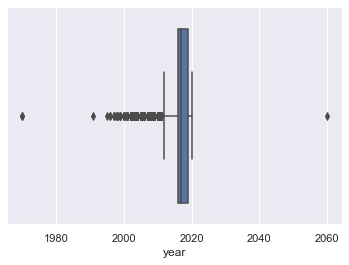

In [10]:
#using boxplot to check for outliers
sns.boxplot(df['year'])

<AxesSubplot:xlabel='price'>

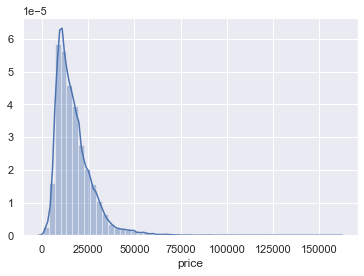

In [11]:
#using histograms to confirm outliers
sns.distplot(df['price'])

<AxesSubplot:xlabel='mpg'>

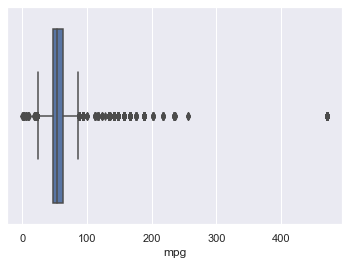

In [12]:
sns.boxplot(df['mpg'])

<AxesSubplot:xlabel='mileage'>

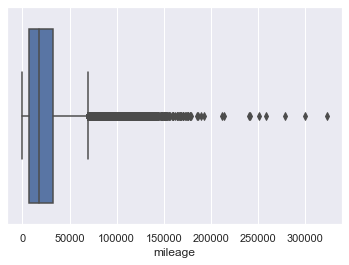

In [13]:
sns.boxplot(df['mileage'])

In [14]:
#using the percentile method to deal with outliers from the mileage,mpg,year and price column
q = df['mpg'].quantile(0.98)
df1 = df[df['mpg']<q]

In [15]:
q = df1['mileage'].quantile(0.98)
df2 = df1[df1['mileage']<q]
df2.describe()

,year,price,mileage,tax,mpg,engineSize
count,98600.000000,98600.000000,98600.000000,98600.000000,98600.000000,98600.000000
mean,2017.209209,17308.232850,21192.475598,123.941075,53.903608,1.673611
std,1.958583,9932.726584,17701.655606,58.476596,10.509930,0.564661
min,1970.000000,590.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10470.000000,7032.000000,125.000000,47.100000,1.200000
50%,2017.000000,14995.000000,16625.000000,145.000000,54.300000,1.600000
75%,2019.000000,21498.000000,31000.000000,145.000000,61.400000,2.000000
max,2060.000000,159999.000000,82980.000000,580.000000,78.400000,6.600000


In [16]:
q = df2['price'].quantile(0.98)
df3 = df2[df2['price']<q]
df3.describe()

,year,price,mileage,tax,mpg,engineSize
count,96628.000000,96628.000000,96628.000000,96628.000000,96628.000000,96628.000000
mean,2017.173635,16501.125657,21499.860382,123.332264,54.297006,1.643031
std,1.958406,7997.232319,17718.665493,58.492348,10.191308,0.518086
min,1970.000000,590.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10300.000000,7407.000000,125.000000,47.100000,1.200000
50%,2017.000000,14800.000000,17016.000000,145.000000,54.300000,1.600000
75%,2019.000000,20990.000000,31287.250000,145.000000,61.400000,2.000000
max,2060.000000,45390.000000,82980.000000,580.000000,78.400000,6.300000


In [17]:
#dropping the 2060 column because thhere's no year as such
df3 = df3[df3.year!= 2060]
df3 = df3[df3.year!= 1970]
df3.describe()

,year,price,mileage,tax,mpg,engineSize
count,96625.000000,96625.000000,96625.000000,96625.000000,96625.000000,96625.000000
mean,2017.174168,16501.203426,21499.429185,123.328745,54.297407,1.643053
std,1.941759,7997.221615,17718.526703,58.489226,10.191209,0.518066
min,1996.000000,590.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10300.000000,7407.000000,125.000000,47.100000,1.200000
50%,2017.000000,14800.000000,17016.000000,145.000000,54.300000,1.600000
75%,2019.000000,20990.000000,31286.000000,145.000000,61.400000,2.000000
max,2020.000000,45390.000000,82980.000000,580.000000,78.400000,6.300000


<AxesSubplot:xlabel='fuelType', ylabel='price'>

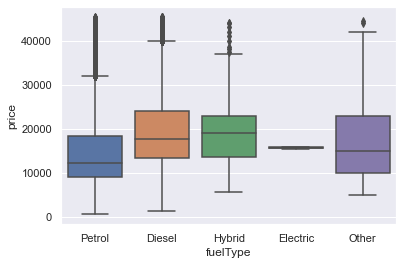

In [18]:
sns.boxplot(x='fuelType',y = 'price',data = df3)

<AxesSubplot:xlabel='transmission', ylabel='price'>

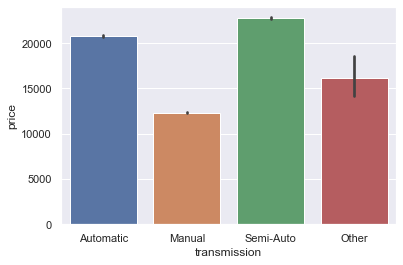

In [19]:
sns.barplot(x = 'transmission', y = 'price', data = df3)

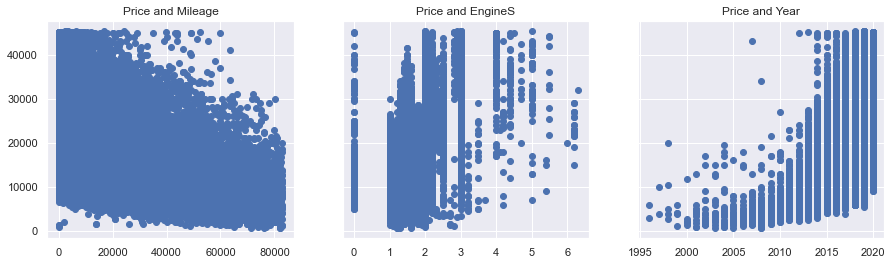

In [20]:
#looking at the relationship between price, engine size and year
f,(ax1,ax2,ax3)= plt.subplots(1,3, sharey = True,figsize = (15,4))
ax1.scatter(df3['mileage'],df3['price'])
ax1.set_title('Price and Mileage')
ax2.scatter(df3['engineSize'],df3['price'])
ax2.set_title('Price and EngineS')
ax3.scatter(df3['year'],df3['price'])
ax3.set_title('Price and Year')
plt.show()

In [21]:
#creating a checkpoint
df_clean = df3.copy()

#### WHAT VARIABLES ARE CORRELATED TO THE PRICE ?

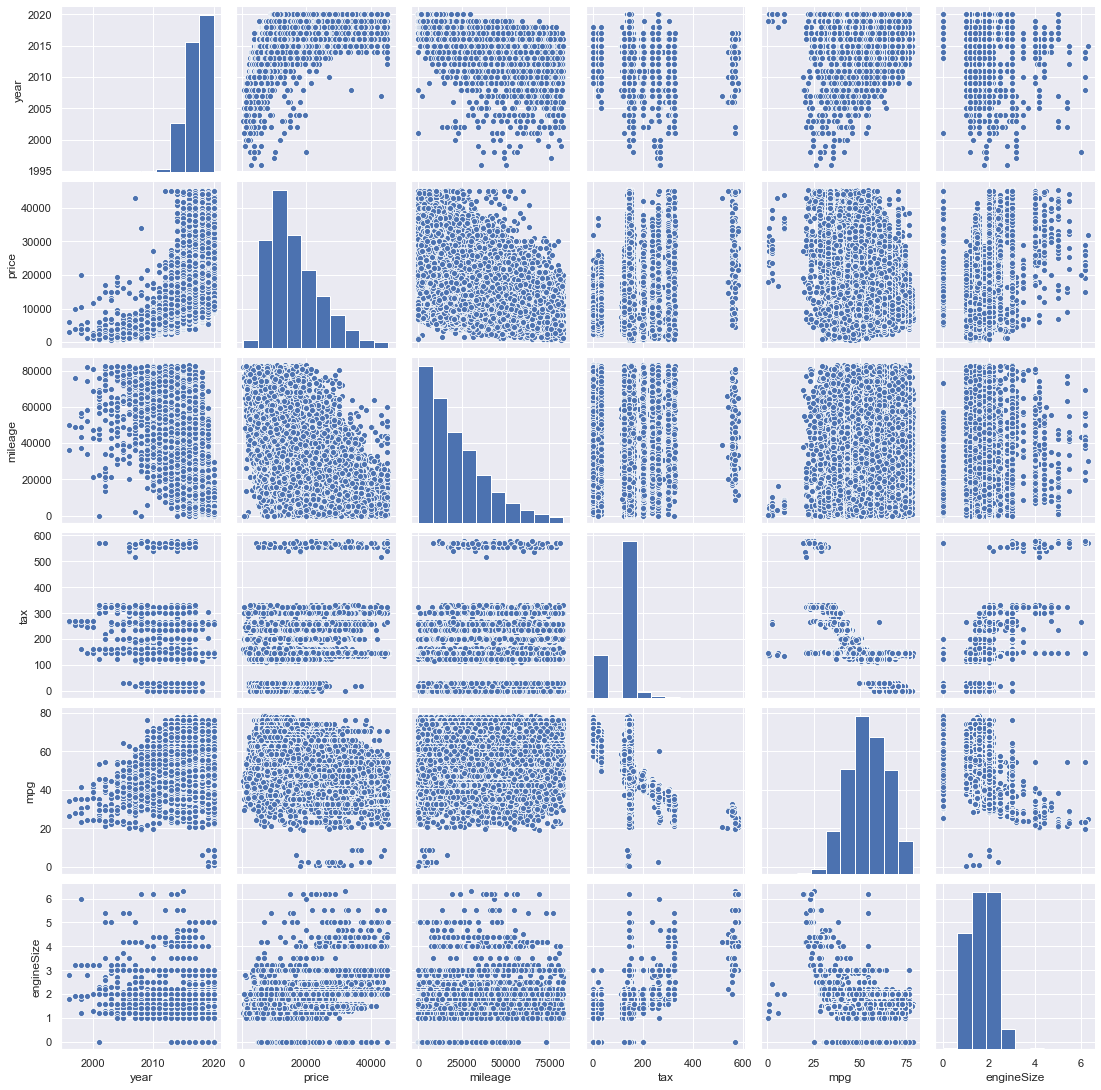

In [22]:
#looking at the correlation plot of each variable
sns.pairplot(df_clean)

In [23]:
#a tabular format of the variable correlation
corr = df_clean.corr()
corr

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.531370,-0.739794,0.249281,-0.218314,-0.070017
price,0.531370,1.000000,-0.442315,0.341845,-0.421516,0.593550
mileage,-0.739794,-0.442315,1.000000,-0.254668,0.268622,0.145784
tax,0.249281,0.341845,-0.254668,1.000000,-0.571026,0.267464
mpg,-0.218314,-0.421516,0.268622,-0.571026,1.000000,-0.257090
engineSize,-0.070017,0.593550,0.145784,0.267464,-0.257090,1.000000


In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
#creating a function that outputs the variance inflation factor
def vif_scores(df):
    VIF_Scores = pd.DataFrame()
    variables = df[['mileage','year','engineSize','mpg']]
    VIF_Scores['features'] = variables.columns
    VIF_Scores['VIF_scores'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
    return VIF_Scores

In [26]:
vif_scores(df_clean)

,features,VIF_scores
0,mileage,2.819658
1,year,53.196688
2,engineSize,12.511337
3,mpg,35.055697


In [27]:
#dropping the year column as it affects every other variable
df_no_mv = df_clean.drop(['year'], axis = 1)

In [28]:
#checking the variance inflation factor again after dropping the year column
def vif_scores(df):
    VIF_Scores = pd.DataFrame()
    variables = df[['mileage','engineSize','mpg']]
    VIF_Scores['features'] = variables.columns
    VIF_Scores['VIF_scores'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
    return VIF_Scores

In [29]:
vif_scores(df_no_mv)

,features,VIF_scores
0,mileage,2.718671
1,engineSize,6.909998
2,mpg,7.655646


### CREATING DUMMIES FOR THE CATEGORICAL VARIABLE 

In [30]:
df_cleaned = df_no_mv

In [31]:
#creating dummies for the categorical variables
df_with_dummies = pd.get_dummies(df_cleaned, drop_first = True)
df_with_dummies

,price,mileage,tax,mpg,engineSize,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,...,model_180,model_200,model_220,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,12000,15944,150.0,57.7,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,14000,9083,150.0,57.7,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,13000,12456,150.0,57.7,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,17500,10460,145.0,40.3,1.5,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,16500,1482,145.0,48.7,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15150,8950,58000,125.0,58.9,2.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
15152,5990,74000,125.0,58.9,2.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
15154,1590,70000,200.0,42.0,1.4,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
15155,1250,82704,150.0,46.3,1.2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [32]:
df_cleaned = df_with_dummies

In [35]:
#splitting the inputs and targets into x and y columns
x = df_cleaned.drop('price', axis = 1)
y = df_cleaned['price']

In [46]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
# using cross validation to get the optimal model result
cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
cross_val_score(LinearRegression(),x,y, cv = cv)

array([0.84510131, 0.84336218, 0.84345698, 0.84924705, 0.84552225])

In [58]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
#creating a function that uses gridsearch to locate the best models and parameters
def find_best_model(x,y):
    algorithms = {
        'linear regression' : {
            'model': LinearRegression(),
            'params':{
                'normalize':[True,False]
            }   
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1.2],
                'selection':['random','cyclic']
                
            }
            
        },
        'decison_tree': {
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }     
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    for algo_name, config in algorithms.items():
        gs = GridSearchCV(config['model'],config['params'], cv = cv, return_train_score = False)
        gs.fit(x,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores, columns = ['model','best_score','best_params'])


find_best_model(x,y)

,model,best_score,best_params
0,linear regression,0.845338,{'normalize': False}
1,lasso,0.840908,"{'alpha': 1.2, 'selection': 'cyclic'}"
2,decison_tree,0.904963,"{'criterion': 'mse', 'splitter': 'random'}"


In [60]:
#the best model is the decisiontreeregressor
best_model = DecisionTreeRegressor(criterion = 'mse', splitter = 'random')